# RL Modelling in OpenAI Gym (Gymnasium)

This notebook introduces the OpenAI Gym library (now called Gymnasium) focusing on:
- Available environments
- Initializing environments
- Stepping through environments
- And more practical aspects

## Installation

First, let's install the library. Note that OpenAI Gym has been renamed to Gymnasium after OpenAI handed over maintenance.

In [ ]:
# For newer installations, use:
!pip install gymnasium

# For compatibility with older code:
# !pip install gym

In [ ]:
# Import required libraries
import gymnasium as gym  # If you're using the older version, use: import gym
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Available Environments

Let's explore what environments are available in the Gym/Gymnasium library.

In [ ]:
# List all available environments
all_envs = gym.envs.registry.keys()
print("Sample of available environments:")
for i, env_name in enumerate(list(all_envs)[:20]):  # Show first 20 environments
    print(f"{i+1}. {env_name}")

Sample of available environments:
1. CartPole-v0
2. CartPole-v1
3. MountainCar-v0
4. MountainCarContinuous-v0
5. Pendulum-v1
6. Acrobot-v1
7. phys2d/CartPole-v0
8. phys2d/CartPole-v1
9. phys2d/Pendulum-v0
10. LunarLander-v3
11. LunarLanderContinuous-v3
12. BipedalWalker-v3
13. BipedalWalkerHardcore-v3
14. CarRacing-v3
15. Blackjack-v1
16. FrozenLake-v1
17. FrozenLake8x8-v1
18. CliffWalking-v0
19. Taxi-v3
20. tabular/Blackjack-v0


Environments are organized into categories:
- Classic control (CartPole, Pendulum, Acrobot, etc.)
- Box2D (LunarLander, BipedalWalker, etc.)
- MuJoCo (Ant, Humanoid, Walker, etc.)
- Atari (Breakout, Pong, SpaceInvaders, etc.)
- Toy text (FrozenLake, Blackjack, etc.)
- Others (multiagent environments, third-party environments, etc.)

## Part 2: Initializing an Environment

Now let's create and initialize an environment. We'll use CartPole, which is a simple and popular environment for beginners.

In [ ]:
# Create a simple environment
env = gym.make("CartPole-v1")

# You can also specify render_mode when creating the environment
# env = gym.make("CartPole-v1", render_mode="human")  # For real-time rendering
# env = gym.make("CartPole-v1", render_mode="rgb_array")  # For programmatic access to frames

The Cart-Pole problem (also called the Inverted Pendulum) is a classic control problem in reinforcement learning. It consists of a cart that moves horizontally on a track with a pole attached to it by a hinge, allowing the pole to rotate vertically.
The challenge is to balance the pole in an upright position by moving the cart left or right. The system is inherently unstable - if no action is taken, the pole will fall over. The agent must apply forces to the cart to keep the pole balanced while keeping the cart within the boundaries of the track.
In the OpenAI Gym/Gymnasium implementation, the agent has two possible actions:

* Push the cart to the left (action 0)
* Push the cart to the right (action 1)

The state space consists of four continuous variables:

* Cart position on the track
* Cart velocity
* Pole angle from vertical
* Pole angular velocity

The episode ends (fails) if:

* The pole angle exceeds ±12 degrees from vertical
* The cart position exceeds ±2.4 units from the center
* Or a maximum number of steps is reached (success)

The reward is +1 for each timestep the pole remains balanced. The goal is to keep the pole upright for as long as possible, maximizing the total reward.
Cart-Pole is popular as a beginner problem in reinforcement learning because it's simple to understand but requires non-trivial control strategies to solve effectively.RetryClaude can make mistakes. Please double-check responses. 3.7 Sonnet

In [ ]:
# Get information about the environment
print("Environment Information:")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")

# If the environment has discrete actions, you can see how many
if hasattr(env.action_space, 'n'):
    print(f"Number of possible actions: {env.action_space.n}")

# For continuous observation spaces, you can check the bounds
if hasattr(env.observation_space, 'high') and hasattr(env.observation_space, 'low'):
    print(f"Observation space high: {env.observation_space.high}")
    print(f"Observation space low: {env.observation_space.low}")

Environment Information:
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)
Number of possible actions: 2
Observation space high: [4.8               inf 0.41887903        inf]
Observation space low: [-4.8               -inf -0.41887903        -inf]


## Part 3: Stepping through an Environment

Let's now learn how to interact with the environment by resetting it and taking steps.

In [ ]:
# Reset the environment to get initial observation
observation, info = env.reset(seed=42)  # Setting a seed for reproducibility
print("Initial observation:", observation)

Initial observation: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]


In [ ]:
# Take a step in the environment
action = env.action_space.sample()  # Take a random action
print("Taking action:", action)

# Step through the environment
observation, reward, terminated, truncated, info = env.step(action)

print("\nAfter taking a step:")
print(f"New observation: {observation}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}")  # True if episode is done due to terminal state
print(f"Truncated: {truncated}")    # True if episode is done due to time limit or other constraint
print(f"Info: {info}")              # Additional information

Taking action: 1

After taking a step:
New observation: [ 0.02727336  0.18847767  0.03625453 -0.26141977]
Reward: 1.0
Terminated: False
Truncated: False
Info: {}


## Part 4: Rendering and Visualization

Let's see how to render and visualize the environment.

In [ ]:
# Different ways to render environments
# Note: Not all environments support all render modes

# Method 1: Using render_mode when creating the environment
render_env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = render_env.reset(seed=42)

# Take a few steps
for _ in range(10):
    action = render_env.action_space.sample()
    observation, reward, terminated, truncated, info = render_env.step(action)

# Get a frame from the environment
frame = render_env.render()
print(f"Render frame shape: {frame.shape}")  # Height, width, channels (RGB)

Render frame shape: (400, 600, 3)


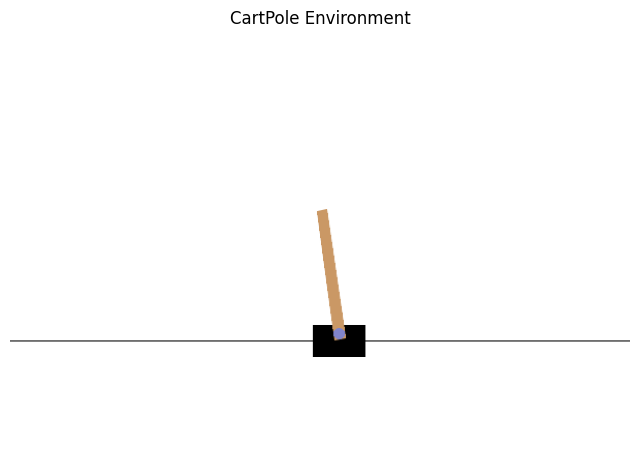

In [ ]:
# Display the frame using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(frame)
plt.title("CartPole Environment")
plt.axis('off')
plt.show()

## Part 5: Complete Episode Example with Data Collection

Let's run a complete episode and collect data along the way.

In [ ]:
import gymnasium as gym

# Create and initialize the environment
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)  # Set seed for reproducibility

total_reward = 0
max_steps = 200

print("Starting episode loop:")
for step in range(max_steps):
    # Choose an action (here we're just using random actions)
    action = env.action_space.sample()

    # Take a step in the environment
    observation, reward, terminated, truncated, info = env.step(action)

    # Accumulate reward
    total_reward += reward

    # Print step information
    print(f"Step {step+1}:")
    print(f"  Action taken: {action}")
    print(f"  New observation: {observation}")
    print(f"  Reward: {reward}")
    print(f"  Total reward so far: {total_reward}")

    # Check if the episode is over
    if terminated or truncated:
        print(f"Episode ended after {step+1} steps")
        break

print(f"Episode complete. Total reward: {total_reward}")

# Close the environment
env.close()

Starting episode loop:
Step 1:
  Action taken: 1
  New observation: [ 0.02727336  0.18847767  0.03625453 -0.26141977]
  Reward: 1.0
  Total reward so far: 1.0
Step 2:
  Action taken: 1
  New observation: [ 0.03104291  0.38306385  0.03102613 -0.5424507 ]
  Reward: 1.0
  Total reward so far: 2.0
Step 3:
  Action taken: 0
  New observation: [ 0.03870419  0.1875199   0.02017712 -0.24015574]
  Reward: 1.0
  Total reward so far: 3.0
Step 4:
  Action taken: 1
  New observation: [ 0.04245459  0.38234788  0.015374   -0.5264066 ]
  Reward: 1.0
  Total reward so far: 4.0
Step 5:
  Action taken: 0
  New observation: [ 0.05010155  0.18701302  0.00484587 -0.22891912]
  Reward: 1.0
  Total reward so far: 5.0
Step 6:
  Action taken: 0
  New observation: [ 0.05384181 -0.00817785  0.00026749  0.06528842]
  Reward: 1.0
  Total reward so far: 6.0
Step 7:
  Action taken: 1
  New observation: [ 0.05367825  0.18694027  0.00157326 -0.2273101 ]
  Reward: 1.0
  Total reward so far: 7.0
Step 8:
  Action taken: 1

## Part 6: Custom Policy Implementation

Let's implement a simple policy for the CartPole environment.

In [ ]:
def simple_policy(observation, env):
    """A simple policy for CartPole - push cart in direction of pole tilt"""
    # For CartPole: observation[2] is pole angle
    if observation[2] > 0:  # If pole is tilting to the right
        return 1  # Push cart right
    else:
        return 0  # Push cart left

# Test the custom policy
print("Testing a simple custom policy:")
observation, info = env.reset(seed=42)
total_reward = 0

for t in range(200):  # CartPole-v1 has a max of 500 steps
    action = simple_policy(observation, env)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    if terminated or truncated:
        break

print(f"Custom policy episode finished after {t+1} timesteps")
print(f"Custom policy total reward: {total_reward}")

Testing a simple custom policy:
Custom policy episode finished after 55 timesteps
Custom policy total reward: 55.0


## Part 7: Saving and Loading Trajectory Data

Let's see how to save and load the data we've collected.

In [ ]:
import pickle

# Save collected trajectory data
trajectory_data = {
    'observations': observations,
    'actions': actions,
    'rewards': rewards
}

# Example of saving data
# with open('cartpole_trajectory.pkl', 'wb') as f:
#     pickle.dump(trajectory_data, f)

# Example of loading data
# with open('cartpole_trajectory.pkl', 'rb') as f:
#     loaded_data = pickle.load(f)

print(f"Trajectory data collected:")
print(f"Observations: {len(observations)} timesteps")
print(f"Shape of first observation: {np.array(observations[0]).shape}")

Trajectory data collected:
Observations: 23 timesteps
Shape of first observation: (4,)


## Clean Up

Always close your environments when you're done with them.

In [ ]:
# Close all environments
env.close()
wrapped_env.close()
render_env.close()
env1.close()
env2.close()

print("Environments closed successfully.")

Environments closed successfully.


## Conclusion

This notebook covered the basics of working with OpenAI Gym/Gymnasium:
- Exploring available environments
- Initializing and configuring environments
- Taking steps and processing the results
- Using wrappers to extend functionality
- Rendering and visualization
- Implementing simple policies
- Data collection and management
- Environment variants and parameters
- Setting seeds for reproducibility

This should provide a solid foundation for beginners to start working with reinforcement learning environments.